# Лабораторная работа №1 по Машинному Обучению

**Краткая информация о выбранных данных**

В качестве датасета для лабораторной работы был выбран набор, который изучает режим сна студентов университетов с целью выявления корреляций между продолжительностью сна, его качеством и различными факторами образа жизни. Данные являются синтетическими, то есть они были сгенерированы искусственно и не отражают реальные данные о людях. Тем не менее, они соответствуют реалистичным распределениям и взаимосвязям и могут служить полезной основой для анализа и моделирования.
Источник данных - https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes.

**Атрибуты**
- Student_ID (индивидуальный номер студента),	int64
- Age (возраст),	int64
- Gender (пол),	object
- University_Year (текущий год обучения в университете),	object
- Sleep_Duration (продолжительность сна),	float64
- Study_Hours (часы занятий),	float64
- Screen_Time (время перед экраном),	float64
- Caffeine_Intake (потребление кофеина),	int64
- Physical_Activity (физическая активность),	int64
- Sleep_Quality (качество сна),	int64
- Weekday_Sleep_Start	 (начало сна в будние дни),	float64
- Weekend_Sleep_Start	 (начало сна в выходные дни),	float64
- Weekday_Sleep_End	(время пробуждения в будние дни),	float64
- Weekend_Sleep_End	(время пробуждения в выходные дни),	float64

**Анализ данных**

1. Сначала просмотрим на то, с какими данными нам придется работать и выведем их в таблицу. Убедимся, что все атрибуты на месте.


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

file = pd.read_csv("student_sleep.csv")
file.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


2. Проверим общую информацию о датасете.

In [82]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


3. Определим количество пропущенных значений.

In [83]:
file.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

4. Определим среднее значение и СКО для каждого атрибута.

In [84]:
attributes = [file['Sleep_Duration'],
                file['Study_Hours'],
                file['Screen_Time'],
                file['Caffeine_Intake'],
                file['Physical_Activity'],
                file['Sleep_Quality'],
                file['Weekday_Sleep_Start'],
                file['Weekend_Sleep_Start'],
                file['Weekday_Sleep_End'],
                file['Weekend_Sleep_End']]

for attr in attributes:
    print(f"{attr.name} mean = {np.mean(attr)}")
    print(f"{attr.name} STD = {np.std(attr)}")
    print("\n")

Sleep_Duration mean = 6.4723999999999995
Sleep_Duration STD = 1.4842770091866275


Study_Hours mean = 5.9816
Study_Hours STD = 3.4722473183804174


Screen_Time mean = 2.525
Screen_Time STD = 0.8585540169377812


Caffeine_Intake mean = 2.462
Caffeine_Intake STD = 1.6806415441729388


Physical_Activity mean = 62.342
Physical_Activity STD = 35.156465066897724


Sleep_Quality mean = 5.362
Sleep_Quality STD = 2.9642800137638816


Weekday_Sleep_Start mean = 11.16686
Weekday_Sleep_Start STD = 5.966376650899607


Weekend_Sleep_Start mean = 12.375860000000001
Weekend_Sleep_Start STD = 5.783818311496308


Weekday_Sleep_End mean = 6.9299
Weekday_Sleep_End STD = 1.181990435663504


Weekend_Sleep_End mean = 8.988100000000001
Weekend_Sleep_End STD = 1.1101409775339346




5. Построим гистограмму распределения значений.

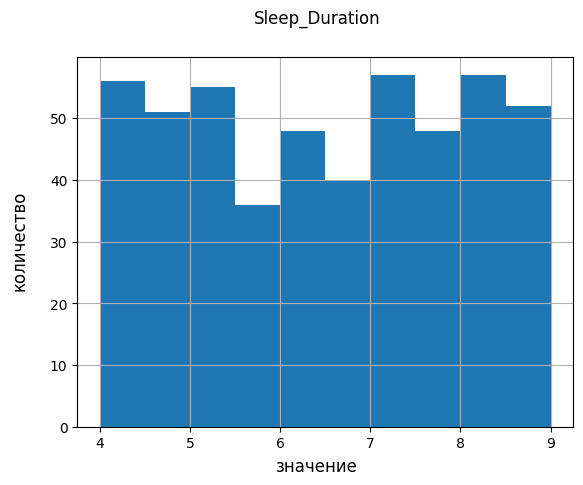

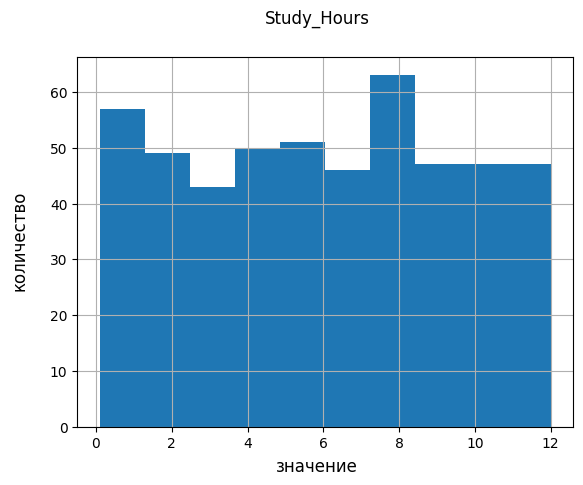

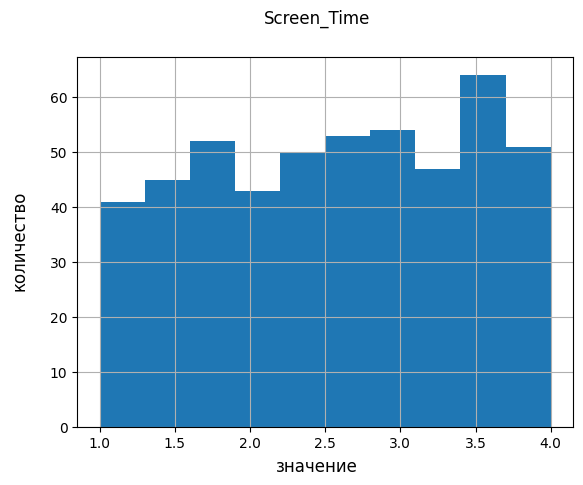

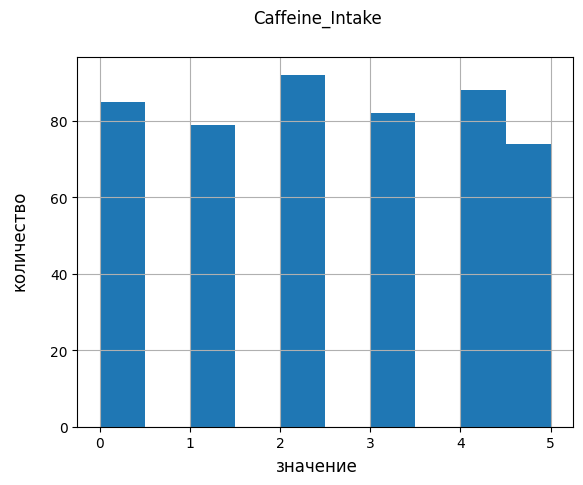

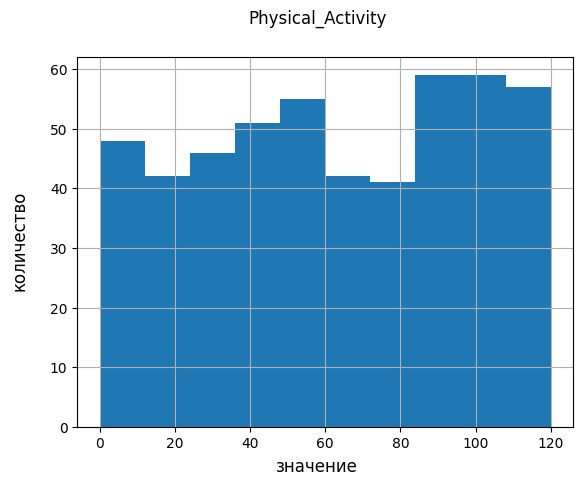

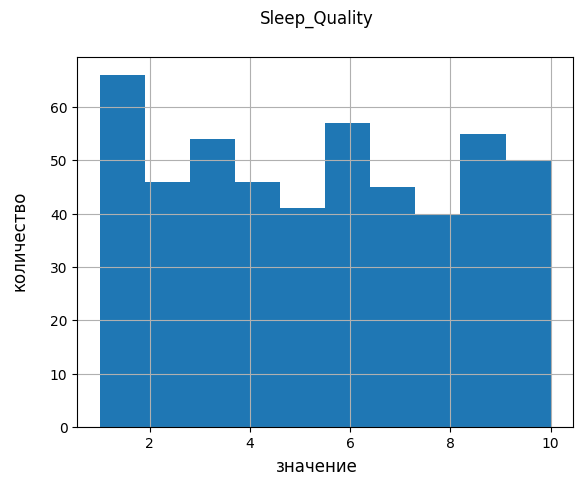

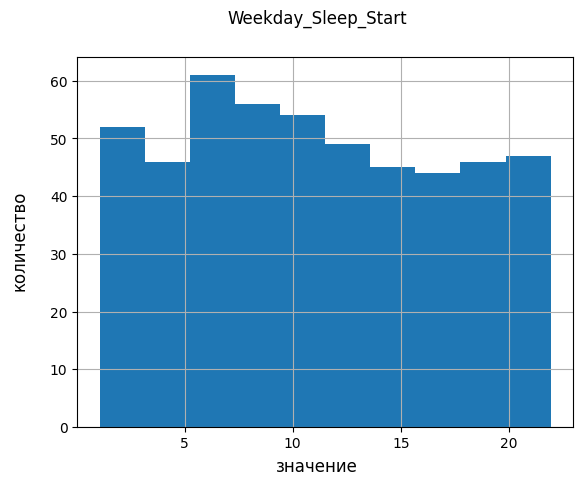

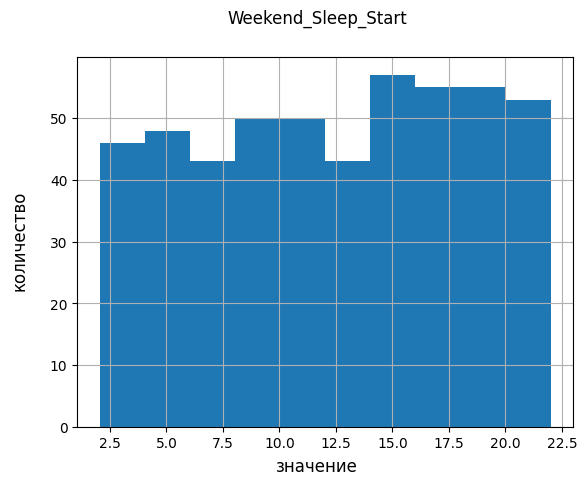

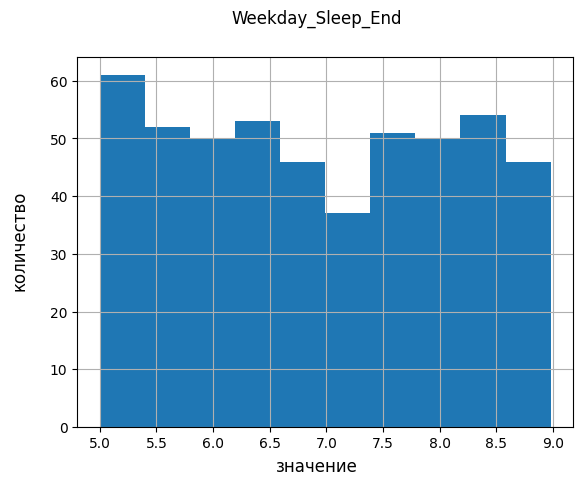

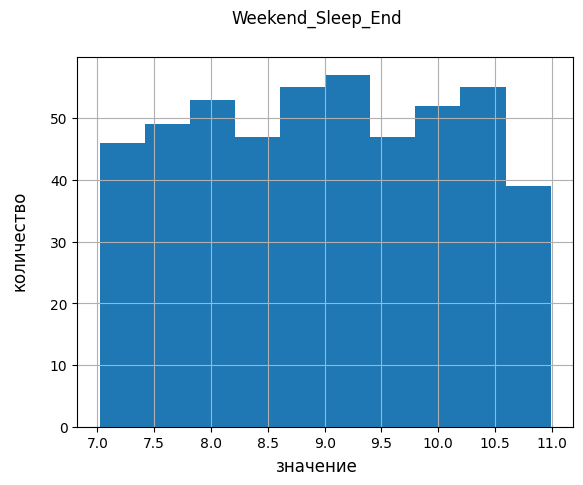

In [85]:
for attr in attributes:
    fig = plt.figure()
    fig.suptitle(attr.name)
    fig.supxlabel("значение")
    fig.supylabel("количество")
    attr.hist()

6. Определим количество выбросов для каждого атрибута, используя Z-оценку.

In [86]:
from scipy import stats

for attr in attributes:
    clean_attr = attr[np.abs(stats.zscore(attr)) < 2]
    print(f"Количество строк с выбросами ({attr.name}): {len(attr)}")
    print(f"Количество строк без выбросов ({attr.name}): {len(clean_attr)}")
    print("\n")

Количество строк с выбросами (Sleep_Duration): 500
Количество строк без выбросов (Sleep_Duration): 500


Количество строк с выбросами (Study_Hours): 500
Количество строк без выбросов (Study_Hours): 500


Количество строк с выбросами (Screen_Time): 500
Количество строк без выбросов (Screen_Time): 500


Количество строк с выбросами (Caffeine_Intake): 500
Количество строк без выбросов (Caffeine_Intake): 500


Количество строк с выбросами (Physical_Activity): 500
Количество строк без выбросов (Physical_Activity): 500


Количество строк с выбросами (Sleep_Quality): 500
Количество строк без выбросов (Sleep_Quality): 500


Количество строк с выбросами (Weekday_Sleep_Start): 500
Количество строк без выбросов (Weekday_Sleep_Start): 500


Количество строк с выбросами (Weekend_Sleep_Start): 500
Количество строк без выбросов (Weekend_Sleep_Start): 500


Количество строк с выбросами (Weekday_Sleep_End): 500
Количество строк без выбросов (Weekday_Sleep_End): 500


Количество строк с выбросами (Weeke

7. Построим матрицу графиков рассеивания.

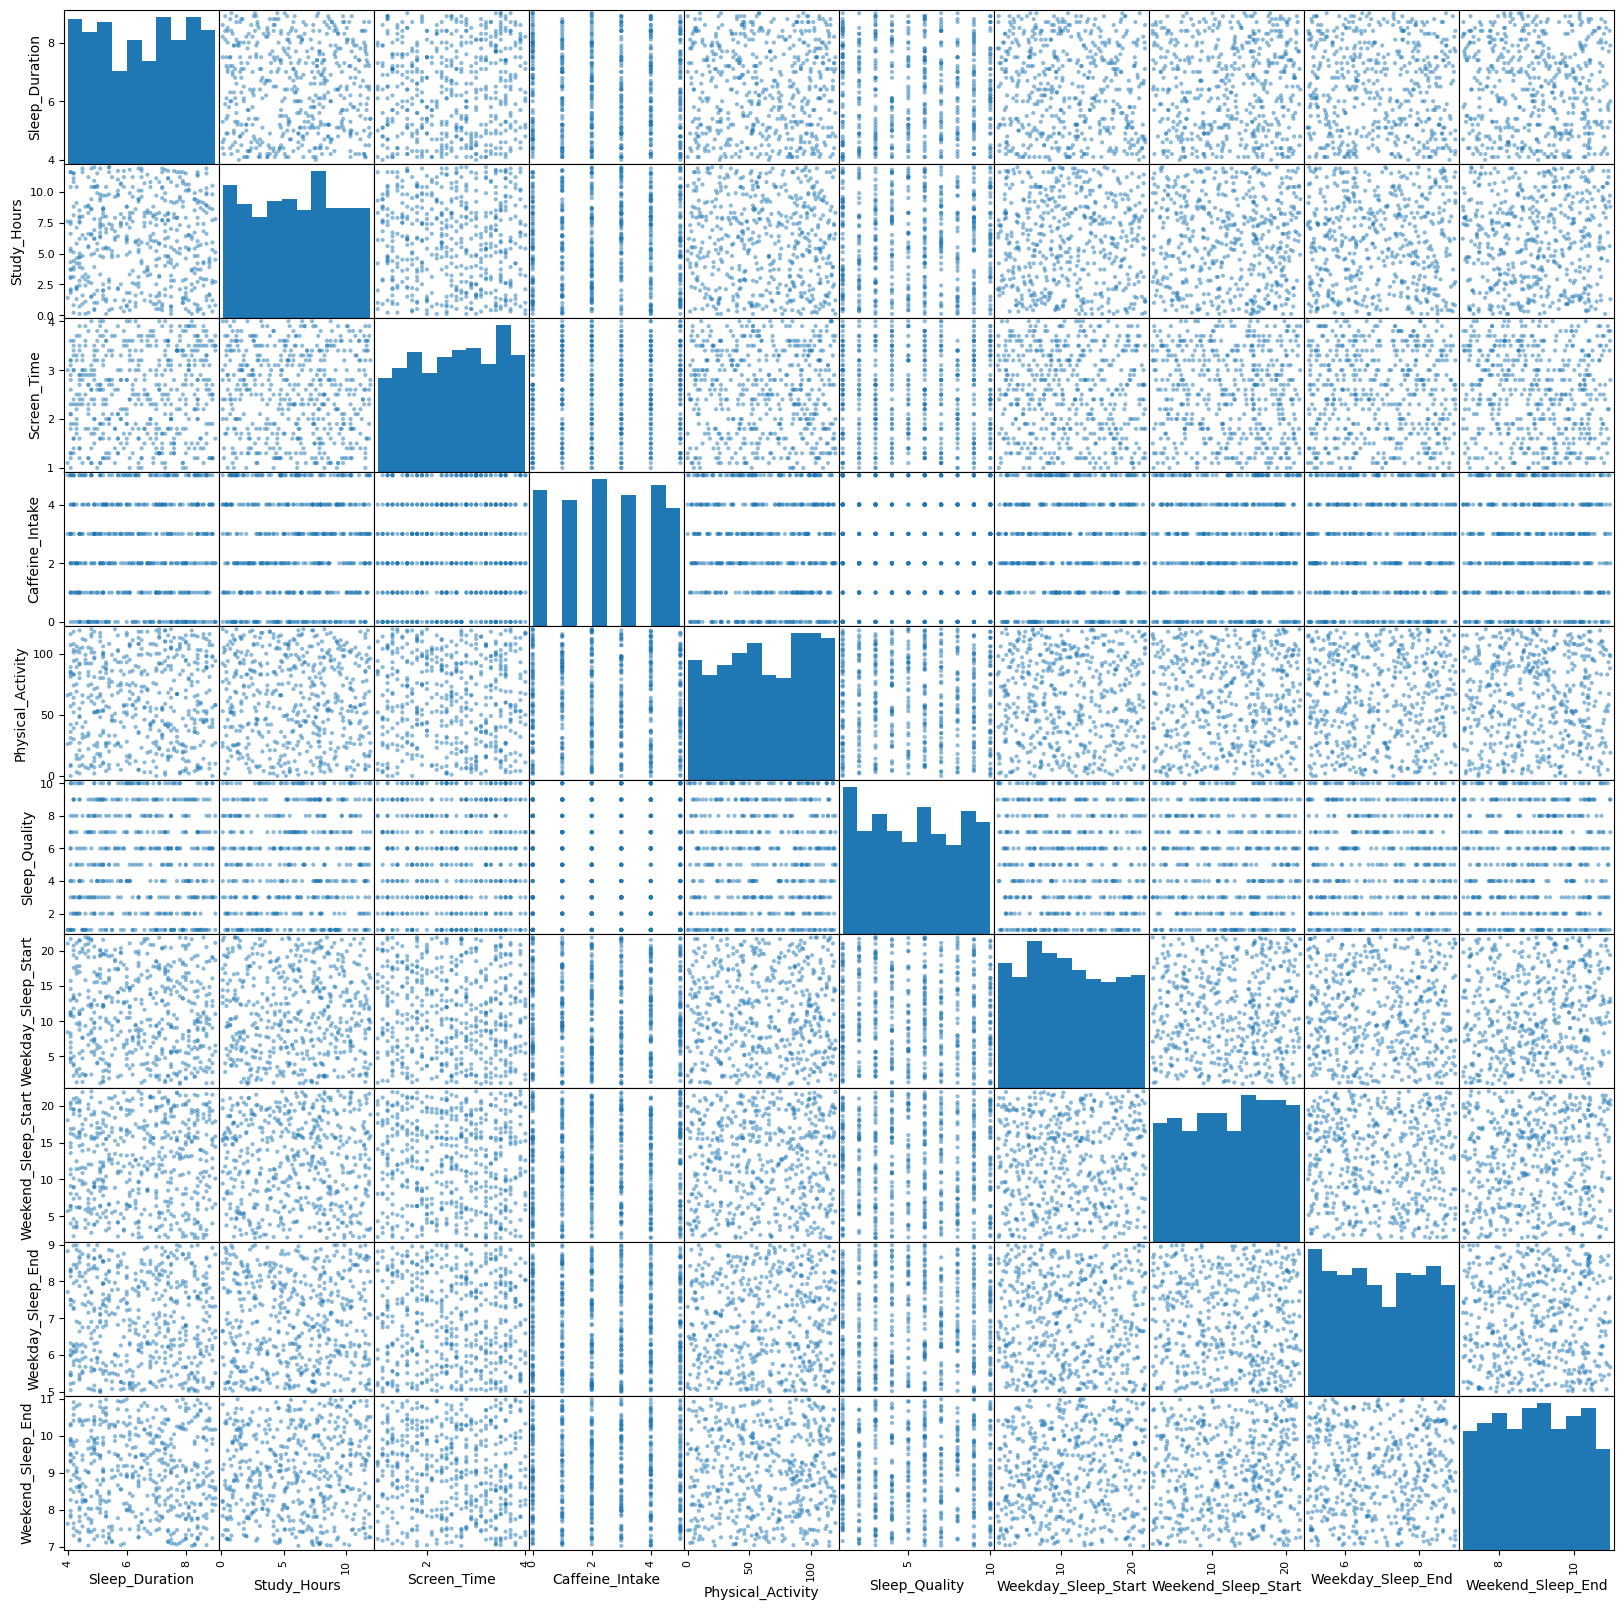

In [87]:
scatter_frame = pd.DataFrame({
    "Sleep_Duration": attributes[0],
    "Study_Hours": attributes[1],
    "Screen_Time": attributes[2],
    "Caffeine_Intake": attributes[3],
    "Physical_Activity": attributes[4],
    "Sleep_Quality": attributes[5],
    "Weekday_Sleep_Start": attributes[6],
    "Weekend_Sleep_Start": attributes[7],
    "Weekday_Sleep_End": attributes[8],
    "Weekend_Sleep_End": attributes[9],
})

scatter_matrix = pd.plotting.scatter_matrix(
    scatter_frame,
    figsize=(20, 20) 
)

8. Построим матрицу корреляции.

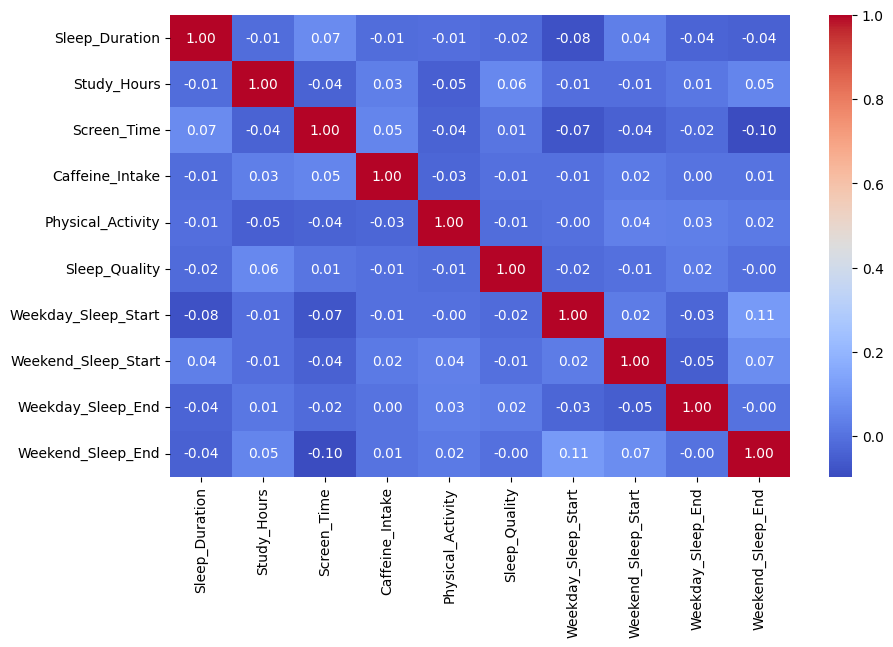

In [88]:
numeric_file = pd.DataFrame({
    "Sleep_Duration": attributes[0],
    "Study_Hours": attributes[1],
    "Screen_Time": attributes[2],
    "Caffeine_Intake": attributes[3],
    "Physical_Activity": attributes[4],
    "Sleep_Quality": attributes[5],
    "Weekday_Sleep_Start": attributes[6],
    "Weekend_Sleep_Start": attributes[7],
    "Weekday_Sleep_End": attributes[8],
    "Weekend_Sleep_End": attributes[9],
})

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_file.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Так как у каждого атрибута значение корреляции < 0.1, связь между атрибутами отсутствует.